In [111]:
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [66]:
files = glob("../csv/例題_データアナリティクス基礎/*")
for i, f in enumerate(files):
    print(i, f)


0 ../csv/例題_データアナリティクス基礎\例題10_自由記述データ&形態素解析データ.xlsx
1 ../csv/例題_データアナリティクス基礎\例題11_乱数で発生させた分布の基本統計量.xlsx
2 ../csv/例題_データアナリティクス基礎\例題1_自転車データ.xlsx
3 ../csv/例題_データアナリティクス基礎\例題2_顧客ID付き食品購入データ.xlsx
4 ../csv/例題_データアナリティクス基礎\例題3_テレビ視聴アンケートデータ.xlsx
5 ../csv/例題_データアナリティクス基礎\例題4_5つの地域の事業所数.xlsx
6 ../csv/例題_データアナリティクス基礎\例題5_関東地方の人口データ.xlsx
7 ../csv/例題_データアナリティクス基礎\例題7_異なる授業形態による成績データ.xlsx
8 ../csv/例題_データアナリティクス基礎\例題8_遊園地テーマパーク入場者数.xlsx
9 ../csv/例題_データアナリティクス基礎\例題9_店舗別販売額.xlsx


In [67]:
questionnaire = pd.read_excel(files[4])
questionnaire.columns = ['id', 'gender', 'sports', 'interest']
questionnaire.head()

,id,gender,sports,interest
0,1,男,みる,ない
1,2,男,みる,ない
2,3,男,みる,ない
3,4,女,みない,ある
4,5,女,みる,ある


スポーツ中継 × 商品への関心 についてのクロス集計表作成

In [68]:
questionnaire_count = questionnaire.pivot_table(index='sports', columns='interest', values='id', aggfunc='count')
questionnaire_count.sort_index(ascending=False)

interest,ある,ない
sports,,
みる,68,188
みない,131,53


スポーツ中継 × 商品への関心 の構成割合についてのクロス集計表作成

In [69]:
questionnaire_ratio = questionnaire_count.apply(lambda x: x / questionnaire_count.sum().sum())
questionnaire_ratio.sort_index(ascending=False).style.format('{:.01%}', na_rep='-')

interest,ある,ない
sports,,
みる,15.5%,42.7%
みない,29.8%,12.0%


行・列にカウントの合計を追加

In [70]:
questionnaire_sum = questionnaire_count.copy()
questionnaire_sum['Total'] = questionnaire_sum.apply(lambda x : sum(x), axis=1)
questionnaire_sum.loc['Total'] = questionnaire_sum.apply(lambda x : sum(x), axis=0)
questionnaire_sum.sort_index(ascending=False)


interest,ある,ない,Total
sports,,,
みる,68,188,256
みない,131,53,184
Total,199,241,440


行・列にカウントの割合合計を追加

In [71]:
questionnaire_sum2 = questionnaire_ratio.copy()
questionnaire_sum2['Total'] = questionnaire_sum2.apply(lambda x : sum(x), axis=1)
questionnaire_sum2.loc['Total'] = questionnaire_sum2.apply(lambda x : sum(x), axis=0)
questionnaire_sum2.sort_index(ascending=False).style.format('{:.01%}', na_rep='-')

interest,ある,ない,Total
sports,,,
みる,15.5%,42.7%,58.2%
みない,29.8%,12.0%,41.8%
Total,45.2%,54.8%,100.0%


行方向の割合合計

In [72]:
questionnaire_ratio2 = questionnaire_count.copy()
questionnaire_ratio2.loc['Total'] = questionnaire_ratio2.sum()
questionnaire_ratio2 = questionnaire_ratio2.apply(lambda x: x / sum(x), axis=1)
questionnaire_ratio2['Total'] = questionnaire_ratio2.apply(lambda x: sum(x), axis=1)
questionnaire_ratio2.sort_index(ascending=False).style.format('{:.01%}', na_rep='-')

interest,ある,ない,Total
sports,,,
みる,26.6%,73.4%,100.0%
みない,71.2%,28.8%,100.0%
Total,45.2%,54.8%,100.0%


列方向の割合合計

In [73]:
questionnaire_ratio3 = questionnaire_count.copy()
questionnaire_ratio3['Total'] = questionnaire_ratio3.apply(lambda x: sum(x), axis=1)
questionnaire_ratio3 = questionnaire_ratio3.apply(lambda x: x / sum(x), axis=0)
questionnaire_ratio3.loc['Total'] = questionnaire_ratio3.sum()
questionnaire_ratio3.sort_index(ascending=False).style.format('{:.01%}', na_rep='-')

interest,ある,ない,Total
sports,,,
みる,34.2%,78.0%,58.2%
みない,65.8%,22.0%,41.8%
Total,100.0%,100.0%,100.0%


In [74]:
questionnaire.head()

,id,gender,sports,interest
0,1,男,みる,ない
1,2,男,みる,ない
2,3,男,みる,ない
3,4,女,みない,ある
4,5,女,みる,ある


性別の「スポーツ中継」に関する構成割合及び、性別の「商品への関心」に関する構成割合

In [75]:
gender_sports = questionnaire.pivot_table(index='gender', columns='sports', values='id', aggfunc='count')
gender_sports.loc['Total'] = gender_sports.sum()
gender_sports = gender_sports.apply(lambda x: x / sum(x), axis=1)
gender_sports['Total'] = gender_sports.sum(axis=1)
gender_sports.style.format('{:.01%}', na_rep='-')

gender_interest = questionnaire.pivot_table(index='gender', columns='interest', values='id', aggfunc='count')
gender_interest.loc['Total'] = gender_interest.sum()
gender_interest = gender_interest.apply(lambda x: x / sum(x), axis=1)
gender_interest['Total'] = gender_interest.sum(axis=1)
gender_interest.style.format('{:.01%}', na_rep='-')

pd.concat([gender_sports, gender_interest], axis=1).style.format('{:.01%}', na_rep='-')

,みない,みる,Total,ある,ない,Total
gender,,,,,,
女,80.4%,19.6%,100.0%,79.4%,20.6%,100.0%
男,10.0%,90.0%,100.0%,17.0%,83.0%,100.0%
Total,41.8%,58.2%,100.0%,45.2%,54.8%,100.0%


観測度数と期待度数

In [76]:
observation_freq = questionnaire_sum.copy()
observation_freq

interest,ある,ない,Total
sports,,,
みない,131,53,184
みる,68,188,256
Total,199,241,440


In [77]:
# 1:1
expected_freq11 = pd.concat([observation_freq['Total']/2, observation_freq['Total']/2, observation_freq['Total']], axis=1)
expected_freq11

,Total,Total,Total
sports,,,
みない,92.0,92.0,184
みる,128.0,128.0,256
Total,220.0,220.0,440


In [78]:
# 2:1
expected_freq12 = pd.concat([observation_freq['Total']*2/3, observation_freq['Total']*1/3, observation_freq['Total']], axis=1)
expected_freq12

,Total,Total,Total
sports,,,
みない,122.666667,61.333333,184
みる,170.666667,85.333333,256
Total,293.333333,146.666667,440


2変数に関連性がないことを仮定したときの期待度数

In [79]:
# 観測度数
questionnaire_sum

interest,ある,ない,Total
sports,,,
みない,131,53,184
みる,68,188,256
Total,199,241,440


In [80]:
# 関連性がないときの期待度数
unrelated_expected_freq = pd.DataFrame()
unrelated_expected_freq['ある'] = questionnaire_sum['Total'] * questionnaire_sum.loc['Total', 'ある'] / questionnaire_sum.loc['Total', 'Total']
unrelated_expected_freq['ない'] = questionnaire_sum['Total'] * questionnaire_sum.loc['Total', 'ない'] / questionnaire_sum.loc['Total', 'Total']
unrelated_expected_freq['Total'] = unrelated_expected_freq.sum(axis=1)
unrelated_expected_freq

,ある,ない,Total
sports,,,
みない,83.218182,100.781818,184.0
みる,115.781818,140.218182,256.0
Total,199.000000,241.000000,440.0


$\chi^2$ 統計量: 観測度数の期待度数からの乖離 

In [81]:
chi2_ = ((questionnaire_sum - unrelated_expected_freq) ** 2 / unrelated_expected_freq).sum().sum()
chi2_

86.09054654473886

クラメールの連関係数, ピアソンの連関係数

In [96]:
rc = np.sqrt(chi2_ / observation_freq.loc['Total', 'Total'] / (min(questionnaire_count.shape)-1))
print(f'クラメールの連関係数: {rc:.03f}')
rp = np.sqrt(chi2_ / (chi2_ + observation_freq.loc['Total', 'Total']))
print(f'クラメールの連関係数: {rp:.03f}')

クラメールの連関係数: 0.442
クラメールの連関係数: 0.405


$\chi^2$ 検定: 母集団における関連性の検定
- $H_0$ : 関連がない
- $H_1$ : 関連がある
- 求めた $\chi^2 = 86.09$

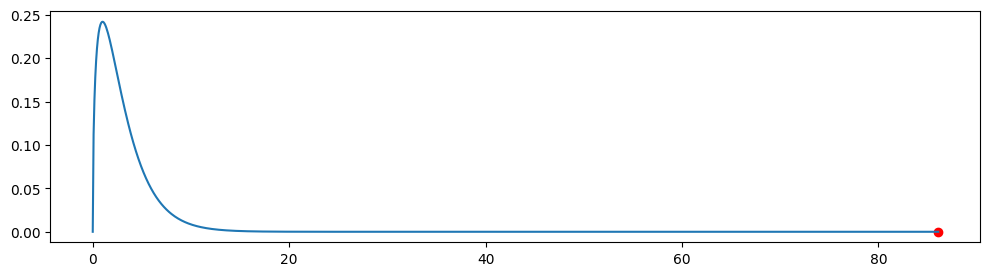

In [119]:
plt.figure(figsize=(12, 3))
x = np.linspace(0, chi2_, 1000)
y = stats.chi2.pdf(x, df=3)
plt.plot(x, y)
plt.scatter(chi2_, 0, color='r')
plt.show()

In [101]:
# カイ二乗のパーセント点
dof = (questionnaire_count.shape[0]-1) * (questionnaire_count.shape[1]-1)
p = np.array([0.01, 0.05, 0.5, 0.95, 0.99])
stats.chi2.ppf(p, dof)

array([1.57087858e-04, 3.93214000e-03, 4.54936423e-01, 3.84145882e+00,
       6.63489660e+00])